In [1]:
import os
import time
import math
import json
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
path = '/home/user/Videos/data.csv'
result = pd.read_csv(path,index_col=0)

In [3]:
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,label
0,0.683735,1.000000,6,6,6,0.545455,10,10,6,1,0.571429,0.5,1
1,0.683735,1.000000,6,6,6,0.545455,10,10,6,1,0.571429,0.5,1
2,0.572509,0.500000,1,1,1,0.500000,1,1,1,1,1.000000,1.0,1
3,0.884629,1.000000,2,2,1,0.500000,3,2,1,1,1.000000,1.0,1
4,0.591580,0.666667,2,2,2,0.000000,2,2,2,1,0.000000,0.0,1


In [4]:
y = result['label']
X = result.drop(['label'],axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
X_test.shape

(167, 12)

In [19]:
# Initialize the logistic regression model
model = LogisticRegression()

In [20]:
# Train the model
model.fit(X_train, y_train)

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
weights = model.coef_
print("Weight vector (coefficients):", weights)

Weight vector (coefficients): [[ 3.21447028  0.94762662  0.39180456 -0.07227384  0.21471831 -0.22500554
   0.04491484 -0.00606723 -0.20152792  2.32357998  0.18916862  1.02578269]]


In [22]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [23]:
# Calculate AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f'AUROC: {auroc:.2f}')

AUROC: 0.95


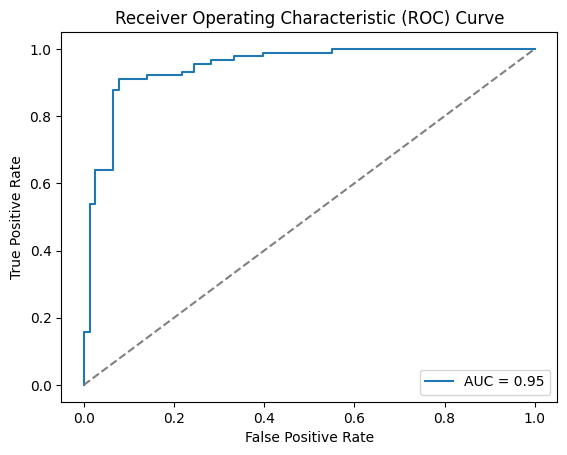

In [24]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auroc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [26]:
print(precision,recall)

0.9 0.9101123595505618


In [27]:
# Additional evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[69  9]
 [ 8 81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        78
           1       0.90      0.91      0.91        89

    accuracy                           0.90       167
   macro avg       0.90      0.90      0.90       167
weighted avg       0.90      0.90      0.90       167

